## Normalisation du spectre de la FFT
Ce notebook contient de l'information facultative : il sert à mieux comprendre la normalisation de la FFT; sa nécessité et son implémentation. On travaillera sur des signaux sinusoïdaux 1D. 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (18, 8)

### Dans un premier temps, oublions la normalisation du signal. 

Soit un signal temporel échantillonné à *$F_e = 100$*, allant de 1 à 10. On créé le signal sinusoïdal $A*sin(2*\pi*f*t)$. 

Text(0, 0.5, 'Module de la FFT')

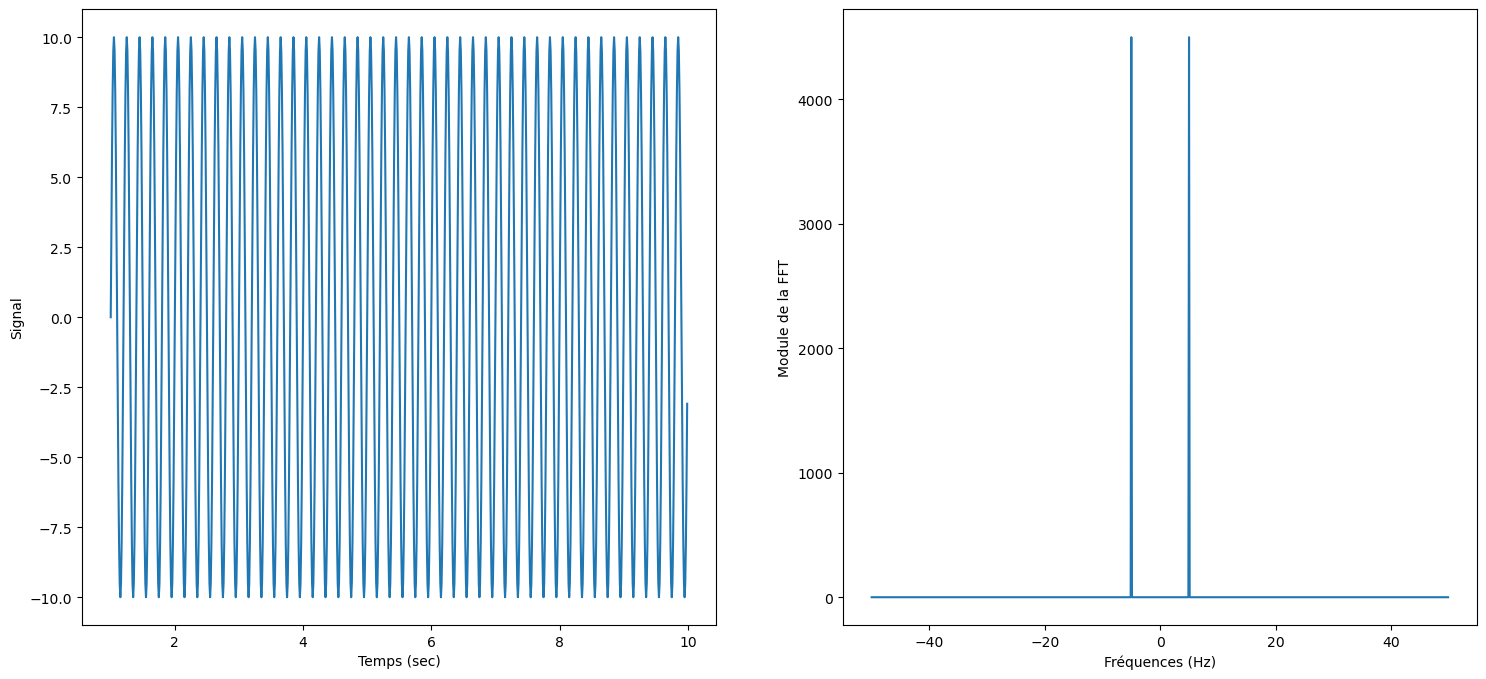

In [69]:
# Vous pouvez changer ces valeurs et regarder comment cela affecte les graphes et résultats. 
Fe = 100
A = 10
f = 5

t1 = np.arange(1, 10, 1/Fe)
N1 = t1.size
signal_1 = A*np.sin(2*np.pi*f*t1)

# on calcule la fft sur les signaux 
# on utilise la fonction fftshift pour que le signal retourné soit symmétrique : allant de -Fe/2 à Fe/2, en passant par 0 au milieu
# (par défaut, les fonctions de np retournent le résultat de la fft pour des fréquences allant de 0 à Fe/2, puis de -Fe/2 vers 0. 
# (voir dernières cellules de ce notebook pour une meilleure idée de la fonction fftshift)
# on utilise la fonction np.abs pour récupérer le module du spectre
spectre_1 = np.abs(np.fft.fftshift(np.fft.fft(signal_1)))

# on utilise la fonction fftfreq pour créer le vecteur de fréquence associé à notre signal, défini par son nombre d'éléments (N) 
# et l'intervalle entre chaque point (d)
fft_freq_1 = np.fft.fftshift(np.fft.fftfreq(N1, d=1/Fe))

# on affiche le signal et le module de la fft
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t1, signal_1)
ax1.set_xlabel('Temps (sec)')
ax1.set_ylabel('Signal')

ax2.plot(fft_freq_1, spectre_1)
ax2.set_xlabel('Fréquences (Hz)')
ax2.set_ylabel('Module de la FFT')

On remarque bien deux pics aux fréquences -5 Hz et 5 Hz. C'est un résultat attendu pour un signal sinusoïdal de fréquence $f=5$. 

Réalisons les mêmes calculs pour un signal temporel allant de 1 à 15 secondes maintenant. 

Text(0, 0.5, 'Module de la FFT')

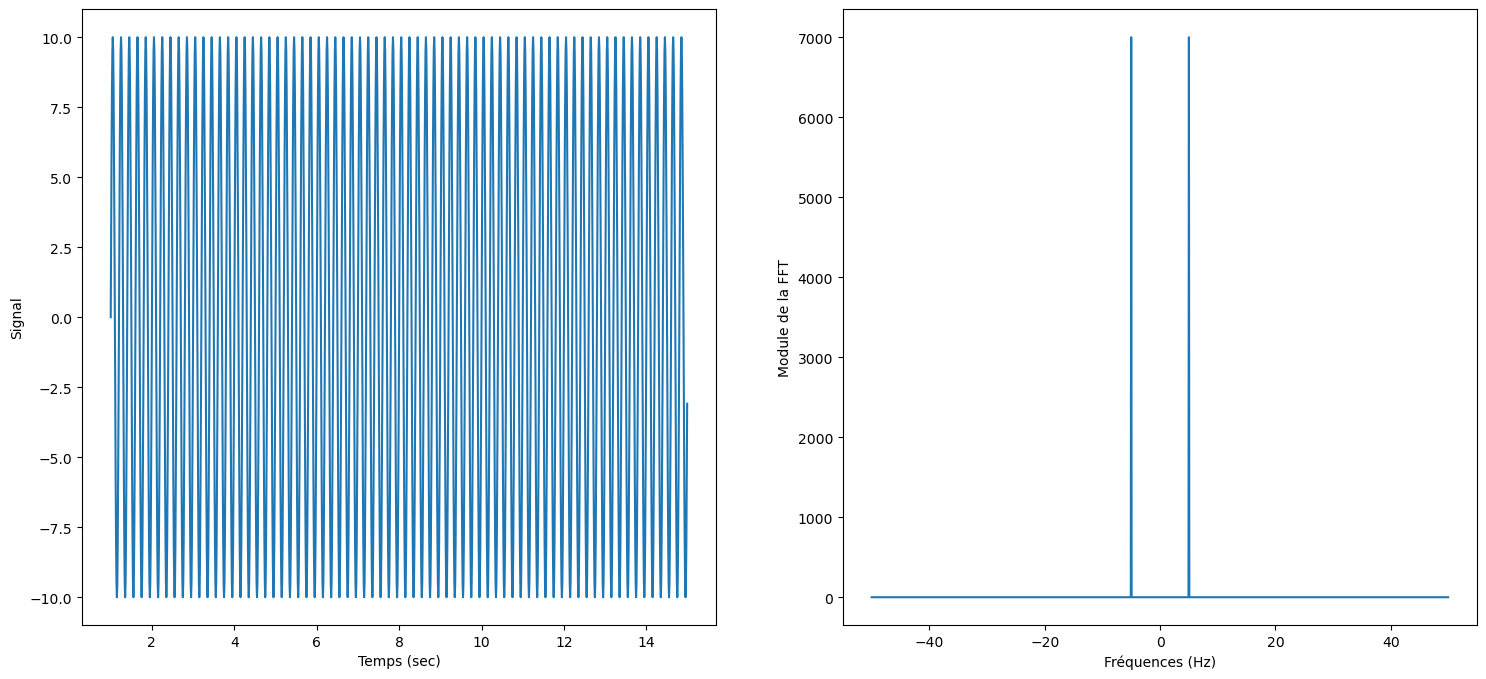

In [38]:
t2 = np.arange(1, 15, 1/Fe)
N2 = t2.size
signal_2 = A*np.sin(2*np.pi*f*t2)

spectre_2 = np.abs(np.fft.fftshift(np.fft.fft(signal_2)))
fft_freq_2 = np.fft.fftshift(np.fft.fftfreq(N2, d=1/Fe))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t2, signal_2)
ax1.set_xlabel('Temps (sec)')
ax1.set_ylabel('Signal')

ax2.plot(fft_freq_2, spectre_2)
ax2.set_xlabel('Fréquences (Hz)')
ax2.set_ylabel('Module de la FFT')

Encore une fois, on remarque deux pics de fréquence -5 et 5 Hz. Par contre, l'amplitude du spectre est différente, alors qu'il n'y a que le nombre d'éléments du vecteur qui a changé. De plus, cette amplitude ne nous dit rien sur l'amplitude initiale du signal ... 

Reprenons les mêmes étapes en normalisant le signal par le nombre d'élément du vecteur. 

Text(0, 0.5, 'Module de la FFT')

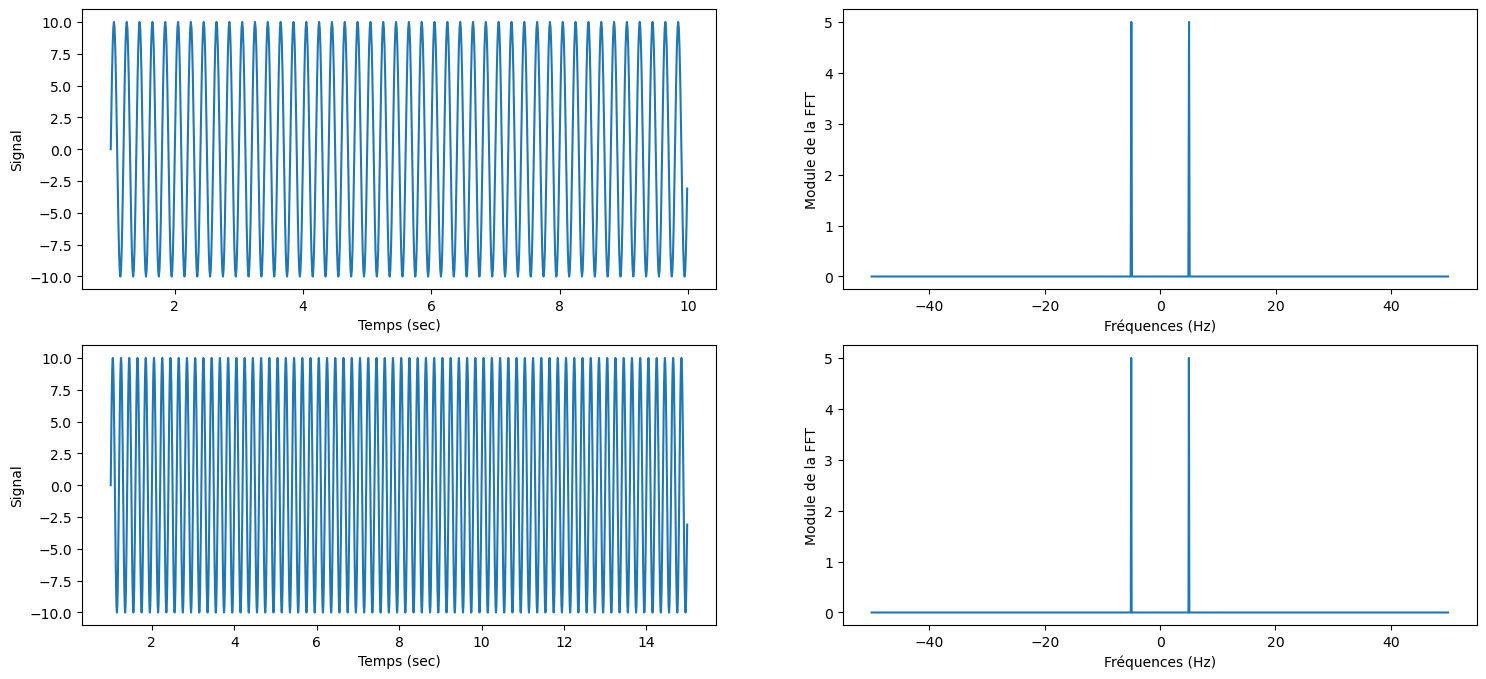

In [39]:
#spectre_1 = np.abs(np.fft.fftshift(np.fft.fft(signal_1))/N1)
#spectre_2 = np.abs(np.fft.fftshift(np.fft.fft(signal_2))/N2)

# les valeurs de norm possibles sont : "forward",  "backward", "ortho"
spectre_1 = np.abs(np.fft.fftshift(np.fft.fft(signal_1, norm='forward')))
spectre_2 = np.abs(np.fft.fftshift(np.fft.fft(signal_2, norm='forward')))
    
# on affiche le signal et le module de la fft
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(t1, signal_1)
ax1.set_xlabel('Temps (sec)')
ax1.set_ylabel('Signal')

ax2.plot(fft_freq_1, spectre_1)
ax2.set_xlabel('Fréquences (Hz)')
ax2.set_ylabel('Module de la FFT')

ax3.plot(t2, signal_2)
ax3.set_xlabel('Temps (sec)')
ax3.set_ylabel('Signal')

ax4.plot(fft_freq_2, spectre_2)
ax4.set_xlabel('Fréquences (Hz)')
ax4.set_ylabel('Module de la FFT')

### fftshift : Comprendre les fréquences retournées par les fonctions de numpy 


On déclare un vecteur de fréquences avec la fonction fftfreq et on regarde les valeurs de ce vecteur aux extrémités et au milieu. 

In [76]:
freq = np.fft.fftfreq(N1, d=1/Fe)
print(f"freq[0], freq[(N-1)/2], freq[N/2], freq[-1]")
print(f"{freq[0]},       {(freq[(N1-1)//2]):.2f},         {(freq[(N1)//2]):.2f},   {freq[-1]:.2f}")
    

freq[0], freq[(N-1)/2], freq[N/2], freq[-1]
0.0,       49.89,         -50.00,   -0.11


On fait la même chose, en utilisant la fonction fftshift

In [77]:
freq = np.fft.fftshift(np.fft.fftfreq(N1, d=1/Fe))
print(f"freq[0], freq[(N-1)/2], freq[N/2], freq[-1]")
print(f"{freq[0]},       {(freq[(N1-1)//2]):.2f},         {(freq[(N1)//2]):.2f},   {freq[-1]:.2f}")
    

freq[0], freq[(N-1)/2], freq[N/2], freq[-1]
-50.0,       -0.11,         0.00,   49.89
